In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import log10
%matplotlib inline
start_time = pd.datetime.now()

In [2]:
mydata = pd.read_excel('card transactions.xlsx', converters={'Merchnum': lambda x: str(x)})
# convert Merchnum from int to string

In [ ]:
# https://realpython.com/python-lambda/

In [4]:
mydata.shape

(96753, 10)

In [5]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [6]:
mydata.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [7]:
mydata.describe(include = 'all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [5]:
numrecords = len(mydata)
print(numrecords)

96753


In [9]:
mydata.count() * 100 /numrecords

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [10]:
len(mydata['Recnum'].unique())

96753

In [11]:
np.mean(mydata['Recnum'])

48377.0

In [13]:
np.std(mydata['Recnum'])

27930.185295960116

In [14]:
np.min(mydata['Recnum'])

1

In [15]:
np.max(mydata['Recnum'])

96753

In [10]:
len(mydata['Cardnum'].unique())

1645

In [17]:
len(mydata[mydata['Cardnum'] == 0])

0

In [19]:
mydata['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142163835       1
5142173161       1
5142245286       1
5142265215       1
5142261785       1
Name: Cardnum, Length: 1645, dtype: int64

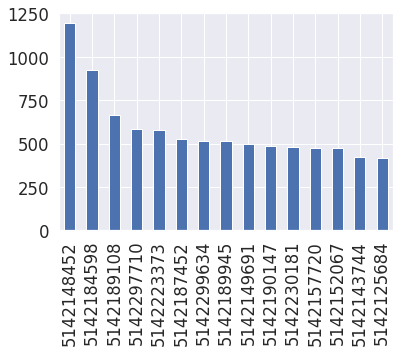

In [22]:
sns.set(font_scale=1.5)
mydata['Cardnum'].value_counts().head(15).plot(kind = 'bar')
plt.savefig('Cardnum.png')
# plt.yscale('log')
# plt.ylim(bottom = 100)

In [12]:
len(mydata['Date'].unique())

365

In [24]:
len(mydata[mydata['Date'] == 0])

0

In [23]:
mydata['Date'].value_counts()

2010-02-28    684
2010-08-10    610
2010-03-15    594
2010-09-13    564
2010-08-09    536
             ... 
2010-11-07     11
2010-10-03     10
2010-01-16      9
2010-10-17      6
2010-12-26      6
Name: Date, Length: 365, dtype: int64

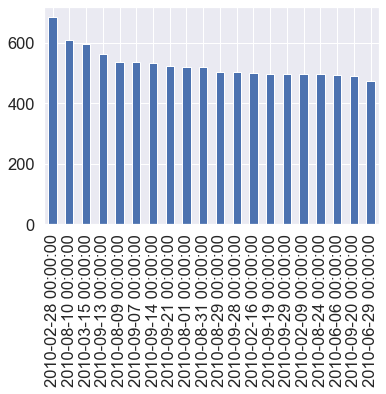

In [13]:
mydata['Date'].value_counts().head(20).plot(kind = 'bar')

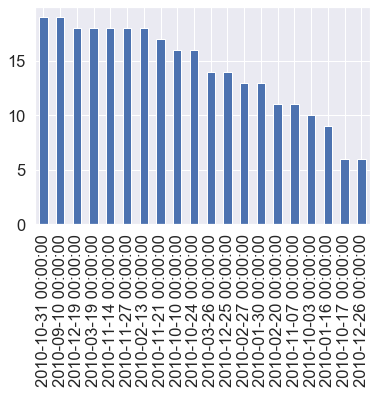

In [14]:
mydata['Date'].value_counts().tail(20).plot(kind='bar')

In [15]:
count_day = mydata.groupby('Date').count()
count_day.head(20)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


In [28]:
numrecords

96753

In [27]:
trx = np.ones(numrecords)
trx
len(trx)

96753

In [19]:
mydata.assign(trx = np.ones(numrecords))

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,trx
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,1.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,1.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,1.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,1.0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,1.0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,1.0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,1.0


In [9]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date'])

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,trx
Date,,,,,,,,,,,
2010-01-01,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
2010-01-01,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,1.0
2010-01-01,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,1.0
2010-01-01,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,1.0
2010-01-01,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,1.0
2010-12-31,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,1.0
2010-12-31,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,1.0


In [8]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 1))\
    .count()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,trx
Date,,,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,29,10,29,29,29,29
2010-01-03,159,159,159,153,159,157,153,159,159,159,159
2010-01-04,229,229,229,221,229,226,221,229,229,229,229
2010-01-05,309,309,309,286,309,299,297,309,309,309,309
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,199,199,199,190,199,196,192,199,199,199,199
2010-12-28,216,216,216,211,216,215,203,216,216,216,216
2010-12-29,263,263,263,252,263,258,246,263,263,263,263


In [16]:
x = dt.timedelta(days = 1)
x.days

1

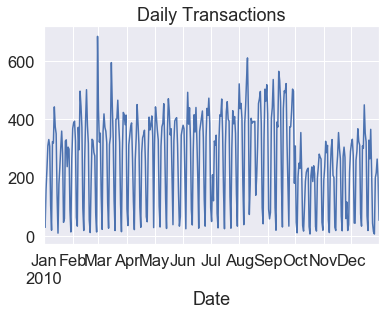

In [16]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 1))\
    .count().trx.plot(title = 'Daily Transactions')

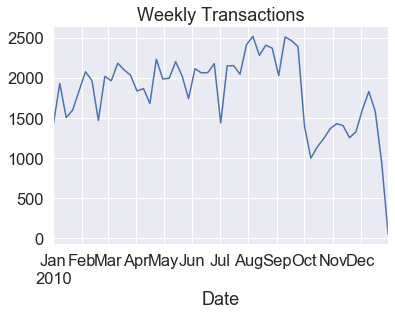

In [17]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions')

In [26]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 30))\
    .count()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,trx
Date,,,,,,,,,,,
2010-01-01,6547,6547,6547,6276,6547,6452,6207,6547,6547,6547,6547
2010-01-31,8450,8450,8450,8162,8450,8402,7897,8450,8450,8450,8450
2010-03-02,8990,8990,8990,8617,8990,8849,8521,8990,8990,8990,8990
2010-04-01,7731,7731,7731,7452,7731,7643,7422,7731,7731,7731,7731
2010-05-01,8618,8618,8618,8283,8618,8515,8338,8618,8618,8618,8618
2010-05-31,9228,9228,9228,8977,9228,9150,8899,9228,9228,9228,9228
2010-06-30,8259,8259,8259,8040,8259,8149,7928,8259,8259,8259,8259
2010-07-30,9989,9989,9989,9786,9989,9884,9656,9989,9989,9989,9989
2010-08-29,10199,10199,10199,9959,10199,10081,9820,10199,10199,10199,10199


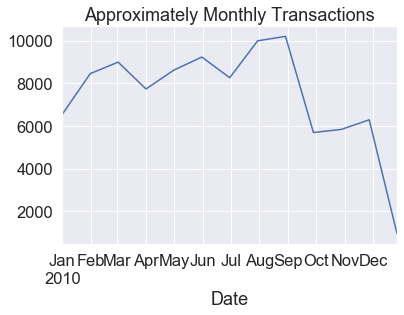

In [18]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 30))\
    .count().trx.plot(title = 'Approximately Monthly Transactions')

In [19]:
len(mydata['Merchnum'].unique())

13092

In [20]:
mydata['Merchnum'].value_counts().head(10)

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
Name: Merchnum, dtype: int64

In [28]:
len(mydata[mydata['Merchnum'] == 0])

0

(100, 10751.574797112271)

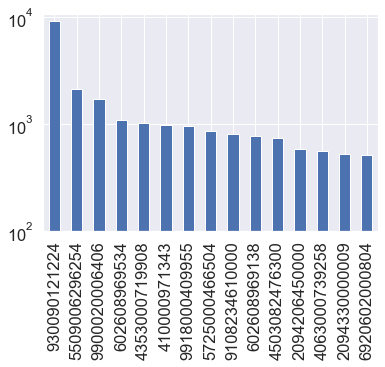

In [21]:
mydata['Merchnum'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)

In [22]:
len(mydata['Merch description'].unique())

13126

In [23]:
mydata['Merch description'].value_counts()

GSA-FSS-ADV                  1688
SIGMA-ALDRICH                1635
STAPLES #941                 1174
FISHER SCI ATL               1093
MWI*MICRO WAREHOUSE           958
CDW*GOVERNMENT INC            872
DELL MARKETING L.P.           816
FISHER SCI CHI                783
AMAZON.COM  *SUPERSTOR        750
OFFICE DEPOT #1082            748
VWR SCIENTIFIC PROD VCTS      688
PC *PC CONNECTION             570
C & C PRODUCT SERVICES        558
BUY.COM                       481
FISHER SCI HUS                442
GSA/CUST SUPPLY CTR 97        435
LAB SAFETY SUPPLY, INC        431
PROFESS OFC ENTERPRISES       421
FRANKLIN COVEY COMPANY        418
STAPLES NATIONAL #471         417
GLOBAL COMPUTER SUPPLY        410
A DAIGER AND CO INC           392
RETAIL CREDIT ADJUSTMENT      383
GOVERNMENT SCIENTIFIC SOU     362
LABSOURCE INC                 346
COLE PARMER INSTRUMENT        341
MC MASTER CARR SUPP           311
GTSI                          309
RETAIL DEBIT ADJUSTMENT       308
THE LIGHTHOUSE

(100, 1772.4)

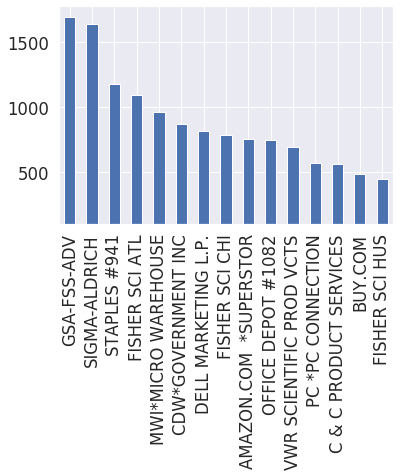

In [33]:
sns.set(font_scale=1.5)
mydata['Merch description'].value_counts().head(15).plot(kind = 'bar')

#plt.yscale('log')
plt.ylim(bottom = 100)

In [24]:
len(mydata['Merch state'].unique())

228

In [25]:
mydata['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
GA      5025
PA      4899
NJ      3912
TX      3790
NC      3322
WA      3300
DC      3208
OH      3131
NY      2430
MO      2420
FL      2143
MA      2081
MI      2033
CO      1987
OR      1510
KS      1236
WI       953
CT       952
MN       939
UT       939
NH       908
NV       726
KY       520
RI       467
OK       411
       ...  
189        1
656        1
972        1
554        1
770        1
989        1
494        1
399        1
713        1
556        1
171        1
846        1
499        1
258        1
808        1
450        1
536        1
937        1
784        1
380        1
635        1
279        1
275        1
341        1
387        1
787        1
587        1
051        1
841        1
625        1
Name: Merch state, Length: 227, dtype: int64

In [35]:
len(mydata[mydata['Merch state'] == 0])

0

In [26]:
len(mydata['Merch zip'].unique())

4568

In [27]:
mydata['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
98101.0     1197
17201.0     1180
30091.0     1092
60143.0      942
60069.0      826
78682.0      817
19380.0      769
20763.0      749
20005.0      648
20748.0      592
20151.0      588
22182.0      583
97213.0      578
22304.0      563
92656.0      552
20036.0      522
84119.0      513
22150.0      501
77251.0      487
19103.0      477
53546.0      432
7606.0       419
22314.0      400
60610.0      373
27707.0      362
           ...  
56308.0        1
90405.0        1
7072.0         1
45217.0        1
18515.0        1
74084.0        1
74101.0        1
74103.0        1
74107.0        1
74115.0        1
37064.0        1
74133.0        1
74135.0        1
48824.0        1
5661.0         1
37205.0        1
6810.0         1
44073.0        1
37130.0        1
15220.0        1
37133.0        1
22664.0        1
37146.0        1
90710.0        1
90712.0        1
90740.0        1
45365.0        1
14604.0       

In [36]:
len(mydata[mydata['Merch zip'] == 0])

0

(100, 13787.33503596619)

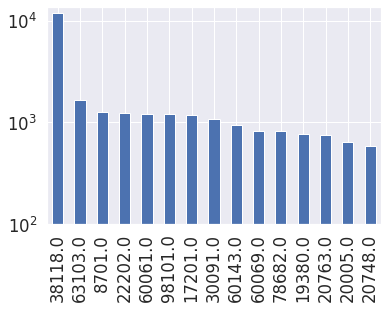

In [38]:
sns.set(font_scale=1.5)
mydata['Merch zip'].value_counts().head(15).plot(kind = 'bar')

plt.yscale('log')
plt.ylim(bottom = 100)



In [28]:
mydata['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

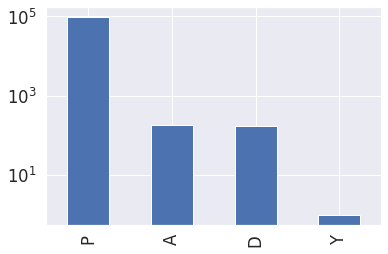

In [40]:
sns.set(font_scale=1.5)
mydata['Transtype'].value_counts().plot(kind = 'bar')
plt.yscale('log')

In [29]:
mydata['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
30.00       317
3.85        271
100.00      252
75.00       243
6.62        219
19.95       210
150.00      208
50.00       205
99.00       200
300.00      196
200.00      193
350.00      178
250.00      171
25.00       171
8.31        164
60.00       159
295.00      158
35.00       157
2500.00     157
195.00      156
500.00      149
20.00       147
199.00      146
3.57        136
125.00      135
           ... 
2386.84       1
275.03        1
956.37        1
58.84         1
4690.00       1
480.74        1
14.43         1
76.34         1
484.82        1
76.01         1
2127.85       1
2365.35       1
305.96        1
607.60        1
221.95        1
518.80        1
412.83        1
47.28         1
169.19        1
675.24        1
2481.44       1
1073.80       1
608.62        1
497.69        1
76.66         1
201.09        1
1394.50       1
197.73        1
282.93        1
120.67        1
Name: Amount, Length: 34

In [42]:
len(mydata[mydata['Amount'] == 0])

0

In [43]:
np.mean(mydata['Amount'])

427.8856774466942

In [44]:
np.std(mydata['Amount'])

10006.088592054835

In [45]:
np.min(mydata['Amount'])

0.01

In [46]:
np.max(mydata['Amount'])

3102045.53

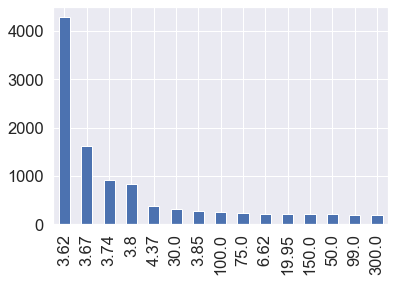

In [30]:
mydata['Amount'].value_counts().head(15).plot(kind = 'bar')

(0.1, 171768.2728626341)

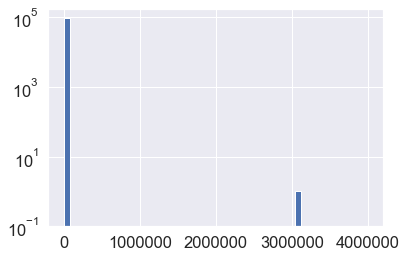

In [31]:
plt.hist(mydata['Amount'],bins=50,range=[0,4000000])
plt.yscale('log')
plt.ylim(bottom = .1)

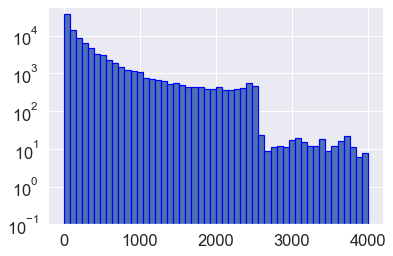

In [32]:
plt.hist(mydata['Amount'],bins=50,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('good distribution')

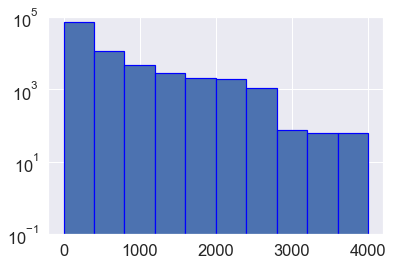

In [33]:
plt.hist(mydata['Amount'],bins=10,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('too few bins')

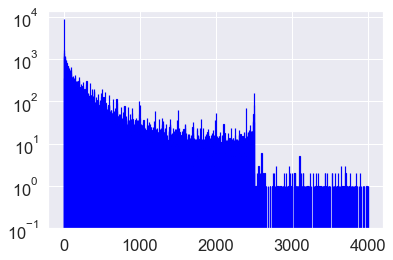

In [34]:
plt.hist(mydata['Amount'],bins=2000,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('too many bins')

In [35]:
mydata['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

In [53]:
temp = mydata[mydata['Transtype'] == 'P']
trans = temp[temp['Amount'] <= 1000000]
trans = trans.reset_index(drop=True)
trans.shape

(96397, 10)

In [54]:
goods = trans[trans['Fraud'] == 0]
bads = trans[trans['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


In [38]:
goods.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [39]:
overall_fraud_rate = len(bads) / len(trans)
print(overall_fraud_rate)

0.010985819060759152


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


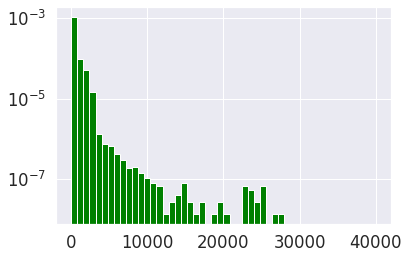

In [59]:
plt.hist(goods['Amount'],bins=50,range=[0,40000], normed = True, color = 'green')
plt.yscale('log')

/Users/stevecoggeshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/stevecoggeshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


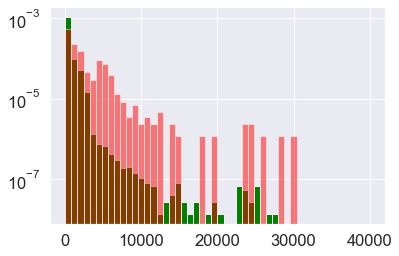

In [40]:
plt.hist(goods['Amount'],bins=50,range=[0,40000], normed = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,40000], normed = True, color = 'red', alpha = .5)
plt.yscale('log')

/Users/stevecoggeshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/stevecoggeshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


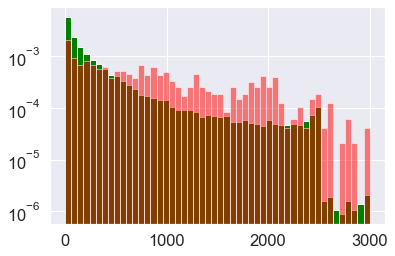

In [41]:
plt.hist(goods['Amount'],bins=50,range=[0,3000], normed = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,3000], normed = True, color = 'red', alpha = .5)
plt.yscale('log')

In [62]:
norm_goods_series

Date
2010-01-01    0.000524
2010-01-02    0.000304
2010-01-03    0.001626
2010-01-04    0.002391
2010-01-05    0.003220
                ...   
2010-12-27    0.002077
2010-12-28    0.002213
2010-12-29    0.002727
2010-12-30    0.002077
2010-12-31    0.000524
Freq: D, Name: trx, Length: 365, dtype: float64

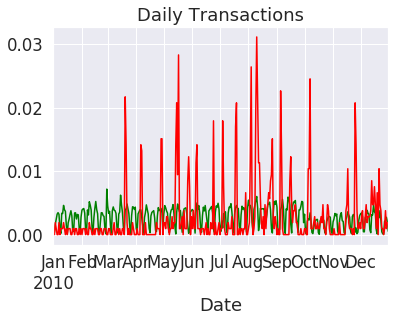

In [60]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

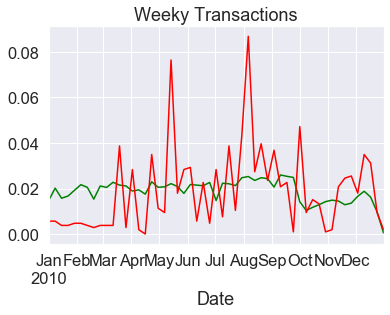

In [43]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

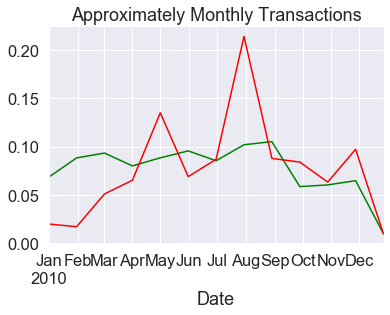

In [44]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 30)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Approximately Monthly Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 30)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [45]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(mydata)
profile.to_file('Data Summary.html')

In [46]:
stop_time = pd.datetime.now()
print('start: ', start_time)
print('stop: ',stop_time)
print('duration: ', stop_time - start_time)

start:  2020-04-29 11:08:42.376794
stop:  2020-04-29 11:09:10.150102
duration:  0:00:27.773308
